# Lab07: PageRank

- MSSV: 18600187
- Họ và tên: Vũ Cao Nguyên

## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; từ `TODO` cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Nộp file **\<MSSV\>.ipynb**

**Nội dung bài tập**

Cài đặt thuật toán Pagerank

## Ma trận kề
Ma trận kề là cấu trúc dữ liệu thường được sử dụng để biểu diễn một đơn đồ thị. 

Một giá trị a[i,j] trong ma trận (dòng i cột j của ma trận A) ứng trọng số của
cung a(i, j) trong đồ thị. Một giá trị đặc biệt được sử dụng cho phần tử a[i, j] (thường là 0) để cho biết không có cung a(i, j) trong đồ thị.  

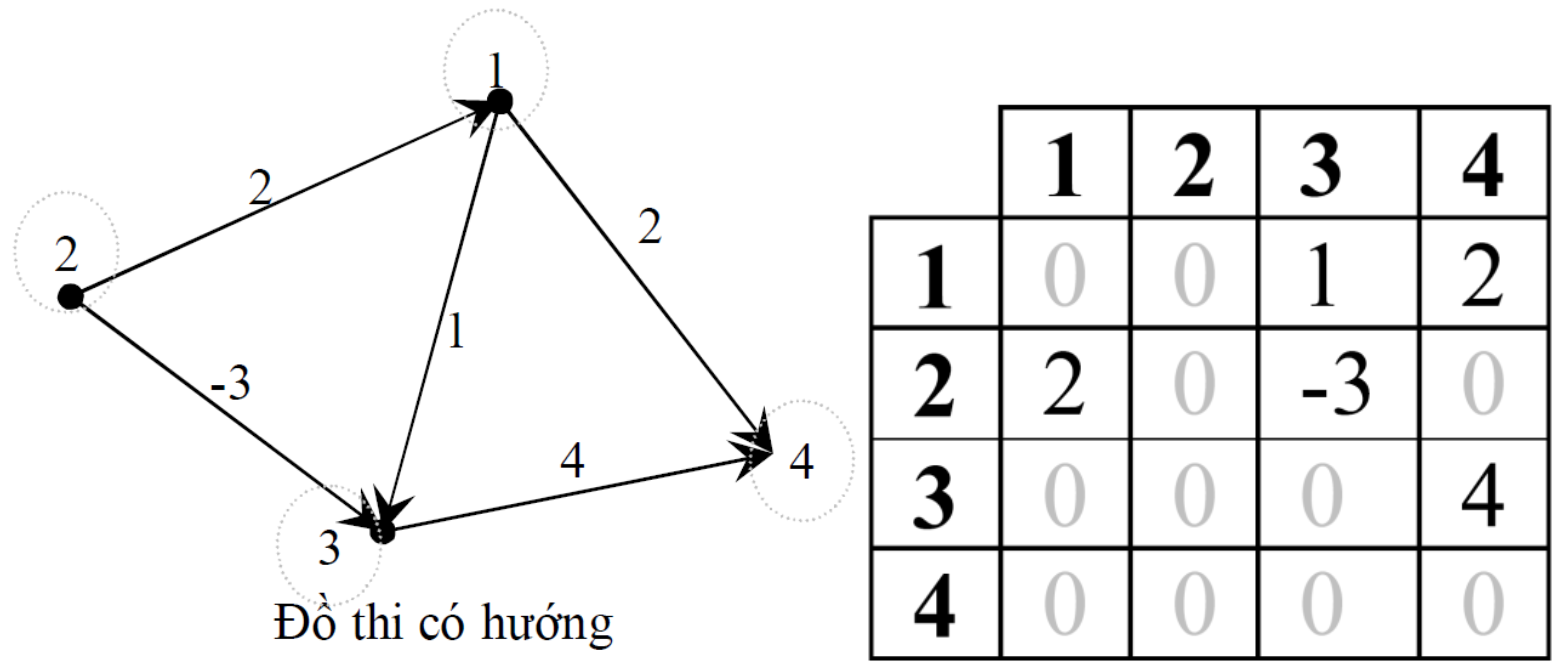

## Pagerank

Giá trị Pagerank đối với bất kỳ trang $u$ có thể tính như sau:
$$PR(u)=\sum _{v \in B_u}\dfrac{PR(v)}{L(v)}$$

Giá trị PageRank đối với trang $u$ phụ thuộc vào giá trị Pagerank của từng trang $v$ có chứa trong set $B_u$ (tập hợp có chứa các trang có link đến trang $u$), chia cho số $L(v)$ các link từ trang $v$


Ngoài việc click trên các liên kết, người lướt web có thể nhảy đến một trang mà không cần đến siêu liên kết:
- Với xác suất $d$, nhảy đến một trang ngẫu nhiên mà không cần đến siêu liên kết.
- Với xác suất $(1-d)$, chọn ngẫu nhiên một siêu liết kết để đến trang khác.

Như vậy:
$$PR(u)= \dfrac{(1-d)}{N} + d \times \sum _{v \in B_u}\dfrac{PR(v)}{L(v)}$$
với $N$ là số lượng trang web.

### Import library

In [1]:
import numpy as np

In [2]:
class PageRank:
    def __init__(self, d=0.85, e=1e-10, page_ranks=None):
        """
        Parameters:
        -----------
        d: damping factor
        epsilon: convergence threshold
        """
        self.d = d
        self.epsilon = e
        self.page_ranks = page_ranks
        
    def initPR(self, matrix):
        """
        Initial page ranks
        
        Parameters:
        -----------
        matrix: (nxn) adjacency matrix 
        -----------
        Returns:
        --------
        page_ranks: 
            - numpy array shape n
            - fill with 1 / n
        """
        # TODO
        n = matrix.shape[0]
        self.page_ranks = np.ones(shape=(1,n))/n
        print(self.page_ranks)
        
    def computeOutDegrees(self, matrix):
        """
        Initial page ranks
        
        Parameters:
        -----------
        matrix: (nxn) adjacency matrix 
        -----------
        Returns:
        --------
        out_degrees: 
            - numpy array shape n
            - stores out degree of each node
        """
        # TODO
        n = matrix.shape[0]
        out_degrees = np.sum(matrix, axis=1)
        return out_degrees
    
    def isConverged(self, prev_page_ranks):
        """
        Our algorithm is converged when the difference between 
        previous page_ranks and current page ranks is lower than epsilon 
        -----------------------------------------
        Return True if our algorithm has converged
        
        """
       
        current_page_ranks = self.page_ranks
        
        # TODO
        current_page_ranks = self.page_ranks
        dx = np.abs(current_page_ranks - prev_page_ranks)
        diff = np.average(dx)
        return diff < self.epsilon
    
    def fit(self, matrix):
        """
        Calculate page ranks
        
        Parameters:
        -----------
        matrix: (nxn) adjacency matrix 
        -----------
        Returns:
        page_ranks: PageRank for each node
        """
        
        if self.page_ranks is None:
             self.initPR(matrix)
        
        out_degrees = self.computeOutDegrees(matrix)
        n = matrix.shape[0]
        while (True):
            prev_page_ranks = self.page_ranks.copy()
            # TODO compute new page ranks
            # self.page_ranks = ...
            self.page_ranks = (1-self.d)/n + self.d*(np.dot(self.page_ranks/out_degrees, matrix))
            if self.isConverged(prev_page_ranks):
                break
        return self.page_ranks

In [3]:
matrix = [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
matrix = np.reshape(matrix, (5, 5))
PR = PageRank()
page_ranks = PR.fit(matrix)

[[0.2 0.2 0.2 0.2 0.2]]


In [4]:
print('Page ranks:')
print(page_ranks)

Page ranks:
[[0.05820455 0.09954545 0.285      0.37       0.18725   ]]
